# Monotonic Trend with Wine Quality Dataset


**Monotonic Trend** (xu hướng đơn điệu) là một khái niệm quan trọng trong quá trình xử lý dữ liệu và mô hình hóa, đặc biệt khi làm việc với các biến mục tiêu có thứ tự (ordinal target). Trong bài viết này, chúng ta sẽ sử dụng **dữ liệu Wine Quality** từ thư viện `seaborn` để minh họa cách áp dụng `OptimalBinning` với ràng buộc monotonic.

---

### **Monotonic Trend là gì?**

Monotonic Trend đảm bảo rằng quan hệ giữa một đặc trưng (feature) và biến mục tiêu (target) sẽ tuân theo một trong hai xu hướng:
- **Xu hướng tăng dần (ascending)**: Giá trị mục tiêu tăng khi giá trị đặc trưng tăng.
- **Xu hướng giảm dần (descending)**: Giá trị mục tiêu giảm khi giá trị đặc trưng tăng.

Việc áp dụng monotonic trend rất hữu ích khi bạn muốn các kết quả binned (chia thành các nhóm) tuân theo kiến thức miền hoặc quan sát thực nghiệm.

---


### **Dữ liệu Wine Quality**

Dữ liệu **Wine Quality** bao gồm thông tin hóa học của rượu vang (như hàm lượng cồn, độ axit, lượng đường, v.v.) và một thang điểm đánh giá chất lượng rượu từ 3 đến 8 (ordinal target). Dữ liệu này phù hợp để áp dụng monotonic trend vì chất lượng rượu thường được cho là tăng lên khi các thông số như hàm lượng cồn tăng.


#### 1. Tải dữ liệu và xử lý

In [15]:
import seaborn as sns
import pandas as pd
from optbinning import OptimalBinning, MulticlassOptimalBinning
from sklearn.model_selection import train_test_split

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, sep=';')

# Define features and target
X = data.drop('quality', axis=1)
y = data['quality'] - 3

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

#### 2. Áp dụng OptimalBinning với ràng buộc monotonic

Bây giờ, chúng ta sẽ sử dụng `OptimalBinning` để chia giá trị hàm lượng cồn (`alcohol`) thành các nhóm (bins) sao cho **chất lượng rượu tăng dần theo hàm lượng cồn**.

In [16]:
X_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

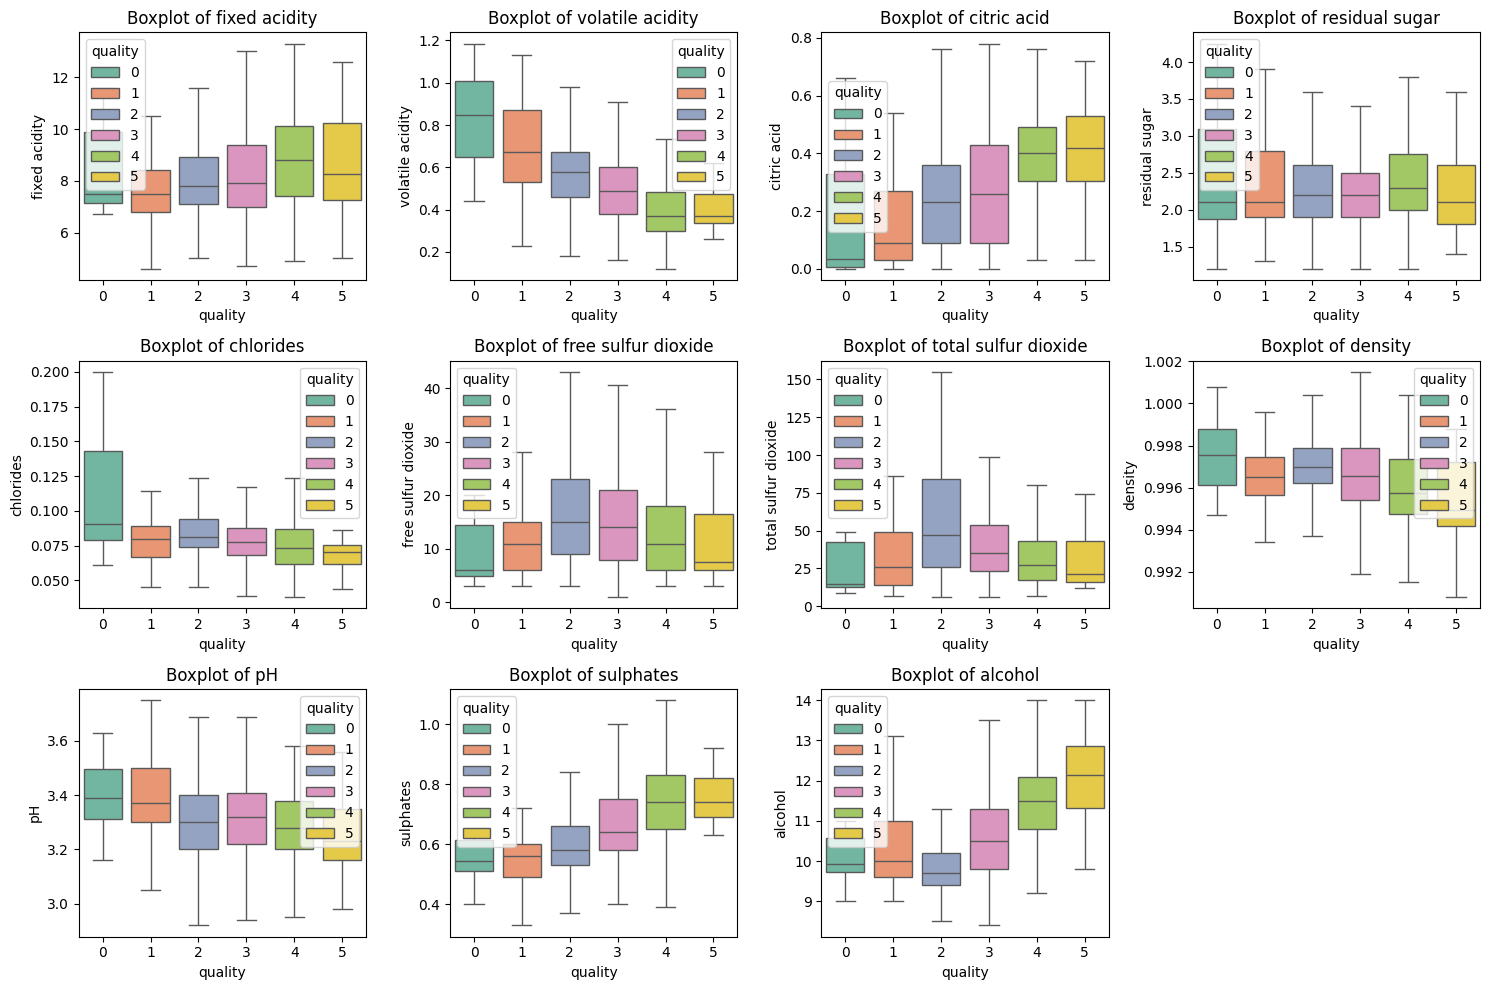

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns to plot
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
           'pH', 'sulphates', 'alcohol']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through each column to create a boxplot
for i, col in enumerate(columns, 1):
    plt.subplot(3, 4, i)  # 3 rows, 4 columns (adjust as needed)
    sns.boxplot(x=y, y=X[col], hue=y, palette="Set2", showfliers=False)  # hue is now explicitly set
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

# Show the plots
plt.show()


In [18]:
variable = 'fixed acidity'
# Define Optimal Binning with monotonic trend
optb = MulticlassOptimalBinning(
    name=variable,
    solver='mip',  # Use Constraint Programming solver
    monotonic_trend=["auto_asc_desc", None, None, None, None, "auto_asc_desc"]
)
# Fit the binning process
optb.fit(X_train[variable], y_train)

MulticlassOptimalBinning(monotonic_trend=['auto_asc_desc', None, None, None,
                                          None, 'auto_asc_desc'],
                         name='fixed acidity', solver='mip')

## Transform Data and Review Results

In [19]:
# Transform alcohol feature into bins
X_train_check = X_train.copy()
X_train_check[f'{variable}_bins'] = optb.transform(X_train[variable], metric='bins')

# Display the binning table
binning_table = optb.binning_table
binning_table.build()

,Bin,Count,Count (%),Event_0,Event_1,Event_2,Event_3,Event_4,Event_5,Event_rate_0,Event_rate_1,Event_rate_2,Event_rate_3,Event_rate_4,Event_rate_5
0,"(-inf, 7.85)",691,0.480195,5,28,316,275,60,7,0.007236,0.040521,0.457308,0.397974,0.086831,0.010130
1,"[7.85, inf)",748,0.519805,4,20,297,299,119,9,0.005348,0.026738,0.397059,0.399733,0.159091,0.012032
2,Special,0,0.000000,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Missing,0,0.000000,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Totals,,1439,1.000000,9,48,613,574,179,16,0.006254,0.033356,0.425990,0.398888,0.124392,0.011119


In [20]:
type(binning_table)

optbinning.binning.binning_statistics.MulticlassBinningTable

#### **Phân tích**
- Dữ liệu đã được chia thành 3 nhóm (bins) dựa trên giá trị của `alcohol`.
- Chất lượng trung bình (event mean) tăng dần theo các nhóm, thể hiện mối quan hệ **xu hướng đơn điệu tăng dần (monotonic ascending)**.
- Điều này phù hợp với giả thuyết rằng hàm lượng cồn cao hơn thường dẫn đến chất lượng rượu tốt hơn.

---

### **Tại sao cần Monotonic Trend?**

1. **Tuân theo kiến thức miền**: Ví dụ, rượu vang có hàm lượng cồn cao thường được đánh giá chất lượng cao hơn.
2. **Giúp mô hình dễ diễn giải hơn**: Kết quả binned đảm bảo logic và phù hợp với thực tế.
3. **Hỗ trợ các mô hình tuyến tính**: Ràng buộc monotonic giúp duy trì tính tuyến tính và thứ tự trong phân tích và dự báo.

---

### **Điều chỉnh và Ứng dụng**
- **Thay đổi tham số**: Bạn có thể điều chỉnh `min_prebin_size`, `min_n_bins`, và `max_n_bins` để kiểm soát số lượng và kích thước nhóm.
- **Ứng dụng thực tế**:
  - Trong mô hình hóa rủi ro tài chính, áp dụng monotonic trend để đảm bảo rằng các biến số như thu nhập, dư nợ có quan hệ hợp lý với mức độ rủi ro.
  - Trong phân tích tiếp thị, đảm bảo rằng các chỉ số như mức chi tiêu tương quan với mức độ trung thành của khách hàng.

---

### **Kết luận**
Ràng buộc **monotonic trend** không chỉ giúp cải thiện tính hợp lý của việc chia nhóm dữ liệu mà còn tăng tính diễn giải của mô hình. Dữ liệu Wine Quality minh họa rõ cách áp dụng monotonic trend để xử lý biến mục tiêu có thứ tự và duy trì mối quan hệ logic với các đặc trưng đầu vào.

In [21]:
import pandas as pd
from optbinning import MulticlassOptimalBinning
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
import logging

# Configure logging for better visibility
logging.basicConfig(level=logging.INFO)

# Custom class that inherits from BaseEstimator and TransformerMixin
class MulticlassBinningTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, monotonic_trend='auto', max_n_bins=5, min_prebin_size=0.05):
        """
        Initialize the MulticlassOptimalBinning object.

        Parameters:
        monotonic_trend : str, list of str or None, default 'auto'
            Specifies the trend assumption for the binning. If it's a string, 
            it applies to all features. If it's a list, each feature will get
            its corresponding monotonic trend.
        max_n_bins : int, default 5
            Maximum number of bins to use.
        min_prebin_size : float, default 0.05
            Minimum percentage of data required in each pre-bin.
        """
        self.monotonic_trend = monotonic_trend   
        self.max_n_bins = max_n_bins
        self.min_prebin_size = min_prebin_size
        self.binning_process = {}   # Initialize an empty dictionary to store binning objects
    
    def fit(self, X, y):
        """
        Fit the binning model on the provided feature(s) X and target y.
        
        Parameters:
        X : pd.DataFrame
            The feature(s) used for binning.
        y : array-like
            The target variable (multiclass).
        
        Returns:
        self : object
            Fitted transformer.
        """
        # Separate features into categorical and numerical features
        self.feats = X.columns.tolist()
        self.cat_feats = X.select_dtypes(include=['object']).columns.tolist()
        self.num_feats = [feat for feat in self.feats if feat not in self.cat_feats]
        
        logging.info(f'Processing Information Value, Total features: {len(self.feats)}. '
                     f'Categorical features: {len(self.cat_feats)}. '
                     f'Numeric features: {len(self.num_feats)}')

        # Fit the binning model for each numerical feature
        for feat in self.num_feats:
            optb = MulticlassOptimalBinning(
                monotonic_trend=self.monotonic_trend,
                max_n_bins=self.max_n_bins,
                min_prebin_size=self.min_prebin_size
            )
            logging.info(f'Fitting binning for feature: {feat}')
            self.binning_process[feat] = optb.fit(X[feat], y)  # Store the fitted binning object
        
        return self
    
    def transform(self, X, metric='mean_woe'):
        """
        Transform the features using the learned binning model.
        
        Parameters:
        X : pd.DataFrame
            The feature(s) to transform.
        metric : str, default='mean_woe'
            The transformation metric, either 'bin' (binned values) or 'woe' (Weight of Evidence).
        
        Returns:
        transformed_X : pd.DataFrame
            The transformed feature(s) using the specified metric.
        """
        transformed_data = pd.DataFrame()

        # Transform each feature separately using the learned binning model
        for feat in self.num_feats:
            transformed_data[feat] = self.binning_process[feat].transform(X[feat], metric=metric)
        
        return transformed_data

    def get_binning_table(self):
        """
        Extract the binning details for each numerical feature after fitting the model.
        
        Parameters:
        X : pd.DataFrame
            The feature(s) to extract binning details for.
        
        Returns:
        binning_process : pd.DataFrame
            A DataFrame with binning details (bin edges, WOE, etc.) for each feature.
        """
        binning_tables = []
        for feat in self.num_feats:
            # Access the binning information for each feature
            tbl = self.binning_process[feat].binning_table.build()  # Get binning table
            tbl['Feature Name'] = feat  # Add feature name for identification
            binning_tables.append(tbl)  # Add the binning table to the list

        # Concatenate all binning tables into a single DataFrame
        all_binning_tables = pd.concat(binning_tables, ignore_index=True)
        
        return all_binning_tables

# Create an instance of the custom transformer
binning_transformer = MulticlassBinningTransformer()

# Fit the binning transformer on the train set
binning_transformer.fit(X_train, y_train)

# Transform the features (train and test sets) into their binned representation
X_train_binned = binning_transformer.transform(X_train, metric='mean_woe')
X_test_binned = binning_transformer.transform(X_test, metric='mean_woe')

# Transform the features into their WOE values (train and test sets)
X_train_woe = binning_transformer.transform(X_train, metric='mean_woe')
X_test_woe = binning_transformer.transform(X_test, metric='mean_woe')


# Print transformed results
print("Transformed (Binned) values for 'fixed acidity' - Train set:")
print(X_train_binned)
print("Transformed (WOE) values for 'fixed acidity' - Train set:")
print(X_train_woe)


INFO:root:Processing Information Value, Total features: 11. Categorical features: 0. Numeric features: 11
INFO:root:Fitting binning for feature: fixed acidity
INFO:root:Fitting binning for feature: volatile acidity
INFO:root:Fitting binning for feature: citric acid
INFO:root:Fitting binning for feature: residual sugar
INFO:root:Fitting binning for feature: chlorides
INFO:root:Fitting binning for feature: free sulfur dioxide
INFO:root:Fitting binning for feature: total sulfur dioxide
INFO:root:Fitting binning for feature: density
INFO:root:Fitting binning for feature: pH
INFO:root:Fitting binning for feature: sulphates
INFO:root:Fitting binning for feature: alcohol


Transformed (Binned) values for 'fixed acidity' - Train set:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.022531          0.149226     0.020826   -1.850372e-17  -0.250851   
1          0.334963          0.149226     0.020826   -1.850372e-17   0.250514   
2          0.022531          0.149226     0.020826   -1.850372e-17   0.138367   
3          0.022531          0.149226     0.020826   -1.850372e-17   0.250514   
4          0.024204          0.114208     0.020826   -1.850372e-17   0.074211   
...             ...               ...          ...             ...        ...   
1434       0.022531          0.114208     0.020826   -1.850372e-17   0.138367   
1435       0.334963          0.149226     0.020826   -1.850372e-17   0.250514   
1436       0.022531          0.149226     0.020826   -1.850372e-17   0.138367   
1437       0.022531          0.149226     0.020826   -1.850372e-17   0.138367   
1438       0.022531          0.149226     0.0208

In [22]:
binning_tables = binning_transformer.get_binning_table()

In [23]:
from optbinning import BinningProcess
import logging
from sklearn.base import TransformerMixin, BaseEstimator
# default use ContinuousOptimalBinning
class OrdinalBinning(BaseEstimator, TransformerMixin):
    def __init__(self, monotonic_trend='auto_asc_desc', max_n_bins=5, min_prebin_size = 0.05):  
        self.monotonic_trend = monotonic_trend   
        self.max_n_bins = max_n_bins
        self.min_prebin_size = min_prebin_size
        self.binning_process = None   

    def fit(self, X, y):        
        self.feats = X.columns.tolist()
        self.cat_feats = X.select_dtypes(include=['object']).columns.tolist()          
        # self.num_feats = list(set(self.feats) - set(self.cat_feats))
        self.num_feats = [item for item in self.feats if item not in self.cat_feats]
        logging.info('Processing Information Value, Total features {}. Categorical features {}. Numeric features {}'.format(len(self.feats), len(self.cat_feats), len(self.num_feats)))
        # Set the binning fit parameters for each feature
        _binning_fit_params = {}
        for fs in self.feats:
            _binning_fit_params[fs] = {'monotonic_trend':self.monotonic_trend,
                                'max_n_bins': self.max_n_bins,
                                'min_prebin_size':self.min_prebin_size,
                                'solver': 'mip'}
            
        # Initialize the BinningProcess with the specified variables and fit parameters    
        _binning_process  = BinningProcess(variable_names = self.feats                                                                    
                                    , binning_fit_params=_binning_fit_params)
        
        # Transform the training data using the BinningProcess
        _binning_process.fit(X, y) 
        self.binning_process = _binning_process        
        

        return self 
    
    def transform(self, X):
        # Transform and convert to DataFrame with original column names
        X_binned = self.binning_process.transform(X)
        return pd.DataFrame(X_binned, columns=X.columns, index=X.index)
    
    def get_feature_names_in(self):
        return self.feats

    def get_feature_names_out(self):
        return self.feats
    
    def get_summary(self):
        # Get the BinningProcess object from the fitted pipeline
        binning_process = self.binning_process

        # Initialize an empty list to hold binning tables for each variable
        binning_tables = []

        # Iterate through the binned variables and build binning tables
        binned_variables = binning_process.variable_names
        for variable in binned_variables:
            print(f"Processing binning for: {variable}")
            
            # Get the binning object for each variable
            binning_object = binning_process.get_binned_variable(variable)
            
            # Build the binning table for the current variable
            binning_table = binning_object.binning_table.build()
            
            # Add the variable name as a column to identify the source column
            binning_table['Feature Name'] = variable
            
            # Append the binning table to the list
            binning_tables.append(binning_table)

        # Concatenate all binning tables into a single DataFrame
        all_binning_tables = pd.concat(binning_tables, ignore_index=True)
        
        return all_binning_tables


In [24]:
ordinal_binning = OrdinalBinning(monotonic_trend='auto', max_n_bins=10, min_prebin_size=0.05)
# Fit and transform data
ordinal_binning.fit(X_train, y_train)
X_train_transformed = ordinal_binning.transform(X_train)
X_test_transformed = ordinal_binning.transform(X_test)

INFO:root:Processing Information Value, Total features 11. Categorical features 0. Numeric features 11


In [25]:
binning_tables = ordinal_binning.get_summary()

Processing binning for: fixed acidity
Processing binning for: volatile acidity
Processing binning for: citric acid
Processing binning for: residual sugar
Processing binning for: chlorides
Processing binning for: free sulfur dioxide
Processing binning for: total sulfur dioxide
Processing binning for: density
Processing binning for: pH
Processing binning for: sulphates
Processing binning for: alcohol


In [26]:
import os
for fs in ordinal_binning.binning_process.summary().name:
    binning_table = ordinal_binning.binning_process.get_binned_variable(fs).binning_table
    # Save the plot as an image file in the export folder
    export_path = os.path.join('D:tmp/', f'WoE/{fs}_binning_plot.png')
    binning_table.plot(show_bin_labels=True, add_special=False, add_missing=False, savefig = export_path)

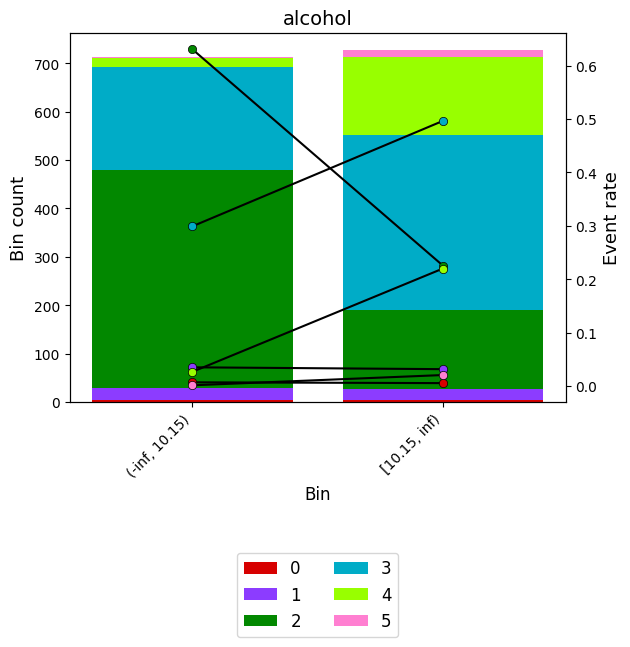

In [27]:
binning_table.plot(show_bin_labels=True, add_special=False, add_missing=False)

In [28]:
binning_table.build()

,Bin,Count,Count (%),Event_0,Event_1,Event_2,Event_3,Event_4,Event_5,Event_rate_0,Event_rate_1,Event_rate_2,Event_rate_3,Event_rate_4,Event_rate_5
0,"(-inf, 10.15)",712,0.494788,5,25,449,213,19,1,0.007022,0.035112,0.630618,0.299157,0.026685,0.001404
1,"[10.15, inf)",727,0.505212,4,23,164,361,160,15,0.005502,0.031637,0.225585,0.496561,0.220083,0.020633
2,Special,0,0.000000,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Missing,0,0.000000,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Totals,,1439,1.000000,9,48,613,574,179,16,0.006254,0.033356,0.425990,0.398888,0.124392,0.011119


In [29]:
binning_table.analysis()

-------------------------------------------------
OptimalBinning: Multiclass Binning Table Analysis
-------------------------------------------------

  General metrics

    JS (Jensen-Shannon)      0.13742779
    HHI                      0.50005433
    HHI (normalized)         0.33340577
    Cramer's V               0.45204457
    Quality score            0.20904416

  Monotonic trend

    Class  0                 descending
    Class  1                 descending
    Class  2                 descending
    Class  3                  ascending
    Class  4                  ascending
    Class  5                  ascending

  Significance tests

    Bin A  Bin B  t-statistic      p-value
        0      1   294.051433 1.902916e-61



In [30]:
type(binning_table)

optbinning.binning.binning_statistics.MulticlassBinningTable